<a href="https://colab.research.google.com/github/polyakova-polina/QMentee/blob/main/%D0%93%D0%B0%D1%83%D1%81_%D0%BF%D1%83%D1%87%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
!pip install matplotlib
!pip install numba

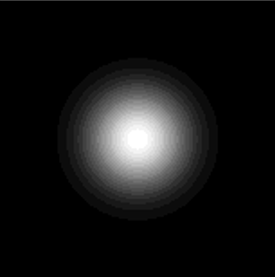

In [44]:
image = Image.open("laser.png")
image.show()


In [9]:
from google.colab import files

In [10]:
uploaded = files.upload()

Saving laser.png to laser (1).png


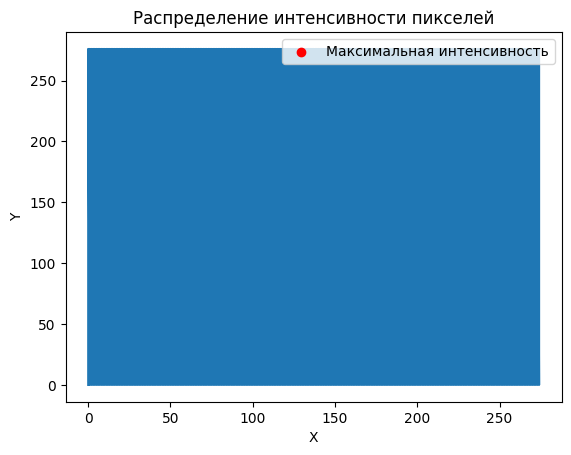

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


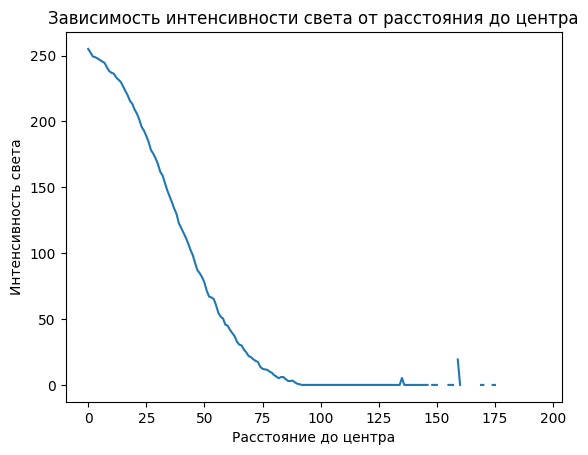

In [33]:
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
import matplotlib.pyplot as plt
import numpy as np

im = Image.open('laser.png')
pixels = im.load() # create the pixel map
x = []
y = []
intensity = []

max_intensity = 0
max_intensity_x = 0
max_intensity_y = 0

for i in range(im.size[0]): # for every pixel:
    for j in range(im.size[1]):
        intensity_value = 0.299 * pixels[i, j][0] + 0.587 * pixels[i, j][1] + 0.114 * pixels[i, j][2]  # получаем значение интенсивности пикселя: Интенсивность = 0.299 * R + 0.587 * G + 0.114 * B
        x.append(i)
        y.append(j)
        intensity.append(intensity_value)

        if intensity_value > max_intensity:  # проверяем, является ли текущая интенсивность максимальной
            max_intensity = intensity_value
            max_intensity_x = i
            max_intensity_y = j

plt.plot(x, y)
plt.scatter(max_intensity_x, max_intensity_y, color='red', label='Максимальная интенсивность')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Распределение интенсивности пикселей')
plt.show()

distances = np.sqrt((np.array(x) - max_intensity_x)**2 + (np.array(y) - max_intensity_y)**2)
average_intensity = []

max_radius = int(np.max(distances))  # находим максимальный радиус

for r in range(max_radius + 1):  # для каждого радиуса до максимального:
    indices = np.where(distances == r) # находим индексы пикселей, находящихся на данном расстоянии до центра
    average_intensity.append(np.mean(np.array(intensity)[indices]))  # вычисляем среднее значение интенсивности для найденных пикселей

plt.plot(range(max_radius + 1), average_intensity)
plt.xlabel('Расстояние до центра')
plt.ylabel('Интенсивность света')
plt.title('Зависимость интенсивности света от расстояния до центра')
plt.show()


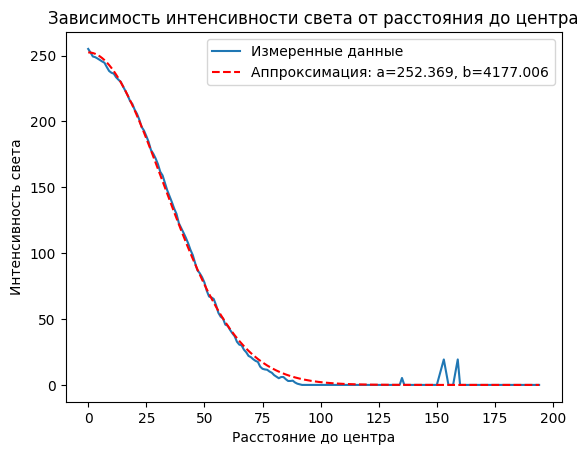

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Определение функции для аппроксимации
dis = []
for r in range(max_radius + 1):
  dis.append(r)

#Исключение точек с бесконечными значениями или NaN
valid_indices = np.isfinite(average_intensity)
average_intensity_valid = np.array(average_intensity)[valid_indices]
dis_valid = np.array(dis)[valid_indices]
def func(dis_valid, a, b):
    return a * np.exp((-2/b) * (dis_valid)**2)

# Аппроксимация
popt, pcov = curve_fit(func, dis_valid, average_intensity_valid)

# График с аппроксимацией
plt.plot(dis_valid, average_intensity_valid, label='Измеренные данные')
plt.plot(dis_valid, func(dis_valid, *popt), 'r--', label='Аппроксимация: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('Расстояние до центра')
plt.ylabel('Интенсивность света')
plt.title('Зависимость интенсивности света от расстояния до центра')
plt.legend()
plt.show()
